In [130]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Building DataFrames

In [131]:
pd.set_option('display.max_columns', 100)

In [132]:
games = pickle.load(open('games.pkl', 'rb'))

In [133]:
games2 = pickle.load(open('games2.pkl', 'rb'))

In [134]:
games2 = games2[10:]

In [135]:
len(games2)

463

In [136]:
len(games)

22631

In [137]:
for x in games2:
    games.append(x)

In [138]:
len(games)

23094

In [139]:
games_full = []
batting = []
pitching = []
pitchers = []

for g in games:
    game_summary = g['game']
    game_summary['home_pitcher'] = g['home_pitchers'][0]['name']
    game_summary['away_pitcher'] = g['away_pitchers'][0]['name']
    game_summary['home_score'] = g['home_batting']['R']
    game_summary['away_score'] = g['away_batting']['R']
    games_full.append(game_summary)
    

In [140]:
games_df_temp = pd.DataFrame(games_full)

In [141]:
for g in games:
    pairs = [
        ('away_batting', batting),
        ('home_batting', batting),
        ('away_pitching', pitching),
        ('home_pitching', pitching),
        ('away_pitchers',pitchers ),
        ('home_pitchers', pitchers)
    ]
    for key, d in pairs:
        if isinstance(g[key], list):
            for x in g[key]:
                if 'home' in key:
                    x['home?'] = True
                    x['team']=g['game']['home_abbr']
                else:
                    x['home?'] = False
                    x['team'] = g['game']['away_abbr']
                x['game_id'] = g['game']['game_id']
                d.append(x)
                
        else:
            x = g[key]
            if 'home' in key:
                x['home?'] = True
                x['team'] = g['game']['home_abbr']
            else:
                x['home?'] = False
                x['team'] = g['game']['away_abbr']
            x['game_id'] = g['game']['game_id']
            d.append(x)
                

In [142]:
batting = pd.DataFrame(batting)

In [143]:
pitching = pd.DataFrame(pitching)

In [144]:
pitchers = pd.DataFrame(pitchers)

In [145]:
batting.head()

,AB,R,H,RBI,BB,SO,PA,batting_avg,onbase_perc,slugging_perc,onbase_plus_slugging,pitches,strikes_total,wpa_bat,leverage_index_avg,wpa_bat_pos,wpa_bat_neg,cwpa_bat,cli_avg,re24_bat,PO,A,details,home?,team,game_id
0,33,3,7,2,2,10,35,.212,.257,.364,.621,125,83,-0.231,1.01,0.525,-0.756%,-0.14%,0.98,-1.8,24,7,,False,CHW,ANA202104010
1,30,4,6,4,4,10,34,.200,.294,.300,.594,140,92,0.266,1.68,1.072,-0.806%,0.15%,1.58,-0.3,27,10,,True,LAA,ANA202104010
2,35,5,9,5,11,10,47,.257,.447,.400,.847,214,122,0.172,1.05,0.985,-0.814%,0.11%,1.11,0.4,27,8,,False,PIT,CHN202104010
3,26,3,2,3,4,13,34,.077,.182,.154,.336,151,91,-0.329,1.24,0.409,-0.738%,-0.20%,1.26,-1.6,27,13,,True,CHC,CHN202104010
4,37,11,10,9,3,7,41,.270,.341,.486,.828,146,102,0.473,0.38,0.601,-0.128%,0.31%,0.41,5.8,27,4,,False,STL,CIN202104010


In [146]:
games_df = games_df_temp[10:]

In [147]:
games_df.shape

(23084, 9)

In [148]:
games_df[['day', 'del1','del2','date']] = games_df['date'].str.extract('(\w+)(,)(\s+)(\w+\s+\d+\W+\s+\d+)', expand=True )
games_df = games_df.drop(columns = ['del1','del2'])

C:\Users\jacob\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [149]:
cond = (games_df['home_score']>games_df['away_score'], games_df['home_score']<games_df['away_score'])
choices = (True, False)
games_df['Home_win'] = np.select(cond, choices)

In [150]:
pitching.head()

,IP,H,R,ER,BB,SO,HR,earned_run_avg,batters_faced,pitches,strikes_total,strikes_contact,strikes_swinging,strikes_looking,inplay_gb_total,inplay_fb_total,inplay_ld,inplay_unk,game_score,inherited_runners,inherited_score,wpa_def,leverage_index_avg,cwpa_def,cli_avg,re24_def,home?,team,game_id
0,8,6,4,2,4,10,1,2.25,34,140,92,47,26,19,9,11,5,0,62,2,0,-0.267,1.68,-0.15%,1.62,0.3,False,CHW,ANA202104010
1,9,7,3,3,2,10,1,3.00,35,125,83,40,25,18,13,10,4,0,53,0,0,0.233,1.01,0.13%,0.95,1.8,True,LAA,ANA202104010
2,9,2,3,2,4,13,0,2.00,34,151,91,35,25,31,8,9,3,0,50,0,0,0.327,1.24,0.21%,1.31,1.6,False,PIT,CHN202104010
3,9,9,5,5,11,10,1,5.00,47,214,122,67,20,35,15,10,8,0,40,8,1,-0.173,1.05,-0.11%,1.07,-0.4,True,CHC,CHN202104010
4,9,10,6,6,5,8,2,6.00,42,176,100,56,24,20,4,24,10,0,29,3,1,0.027,0.54,0.02%,0.59,-0.8,False,STL,CIN202104010


In [151]:
pitchers

,IP,H,R,ER,BB,SO,HR,earned_run_avg,batters_faced,pitches,strikes_total,strikes_contact,strikes_swinging,strikes_looking,inplay_gb_total,inplay_fb_total,inplay_ld,inplay_unk,game_score,inherited_runners,inherited_score,wpa_def,leverage_index_avg,cwpa_def,cli_avg,re24_def,name,home?,team,game_id
0,5.1,2,2,2,2,8,1,3.38,20,87,59,29,17,13,2,8,3,0,62,,,0.088,0.98,0.05%,0.95,0.9,giolilu01,False,CHW,ANA202104010
1,1.2,2,0,0,1,1,0,0.00,7,20,12,8,2,2,2,3,2,0,,0,0,0.160,1.82,0.09%,1.75,0.8,heuerco01,False,CHW,ANA202104010
2,0.2,2,2,0,1,1,0,0.00,6,28,18,9,5,4,4,0,0,0,,0,0,-0.552,3.60,-0.32%,3.47,-2.1,bummeaa01,False,CHW,ANA202104010
3,0.1,0,0,0,0,0,0,0.00,1,5,3,1,2,0,1,0,0,0,,2,0,0.037,1.22,0.02%,1.18,0.6,fostema01,False,CHW,ANA202104010
4,6,6,3,3,1,6,1,4.50,25,88,59,33,12,14,10,8,4,0,53,,,-0.051,0.94,-0.03%,0.88,0.2,bundydy01,True,LAA,ANA202104010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191797,0.2,1,0,0,0,1,0,5.14,3,7,6,3,1,2,1,1,0,0,,2,1,0.024,1.43,0.00%,0.00,-0.1,murphpa02,True,WSN,WAS202110030
191798,0.2,4,3,3,0,1,0,5.47,6,22,14,7,4,3,2,3,2,0,,0,0,-0.375,1.75,0.00%,0.00,-2.8,feddeer01,True,WSN,WAS202110030
191799,1.1,0,0,0,0,0,0,3.53,4,22,15,11,1,3,2,2,0,0,,1,0,0.167,1.60,0.00%,0.00,0.8,machaan02,True,WSN,WAS202110030
191800,0.1,1,2,1,0,1,1,3.55,3,12,7,4,2,1,1,1,1,0,,0,0,-0.421,2.92,0.00%,0.00,-1.8,finneky01,True,WSN,WAS202110030


In [152]:
batting.head()

,AB,R,H,RBI,BB,SO,PA,batting_avg,onbase_perc,slugging_perc,onbase_plus_slugging,pitches,strikes_total,wpa_bat,leverage_index_avg,wpa_bat_pos,wpa_bat_neg,cwpa_bat,cli_avg,re24_bat,PO,A,details,home?,team,game_id
0,33,3,7,2,2,10,35,.212,.257,.364,.621,125,83,-0.231,1.01,0.525,-0.756%,-0.14%,0.98,-1.8,24,7,,False,CHW,ANA202104010
1,30,4,6,4,4,10,34,.200,.294,.300,.594,140,92,0.266,1.68,1.072,-0.806%,0.15%,1.58,-0.3,27,10,,True,LAA,ANA202104010
2,35,5,9,5,11,10,47,.257,.447,.400,.847,214,122,0.172,1.05,0.985,-0.814%,0.11%,1.11,0.4,27,8,,False,PIT,CHN202104010
3,26,3,2,3,4,13,34,.077,.182,.154,.336,151,91,-0.329,1.24,0.409,-0.738%,-0.20%,1.26,-1.6,27,13,,True,CHC,CHN202104010
4,37,11,10,9,3,7,41,.270,.341,.486,.828,146,102,0.473,0.38,0.601,-0.128%,0.31%,0.41,5.8,27,4,,False,STL,CIN202104010


In [153]:
batting.dtypes

AB                      object
R                       object
H                       object
RBI                     object
BB                      object
SO                      object
PA                      object
batting_avg             object
onbase_perc             object
slugging_perc           object
onbase_plus_slugging    object
pitches                 object
strikes_total           object
wpa_bat                 object
leverage_index_avg      object
wpa_bat_pos             object
wpa_bat_neg             object
cwpa_bat                object
cli_avg                 object
re24_bat                object
PO                      object
A                       object
details                 object
home?                     bool
team                    object
game_id                 object
dtype: object

In [154]:
games_df[games_df.duplicated('game_id') == True]

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win
2440,OAK201203280,SEA,OAK,"March 28, 2012",Start Time: 7:09 p.m. Local,mccarbr01,hernafe02,1,3,Wednesday,0
2441,OAK201203290,SEA,OAK,"March 29, 2012",Start Time: 6:04 p.m. Local,colonba01,vargaja01,4,1,Thursday,1
2442,MIA201204040,STL,MIA,"April 4, 2012",Start Time: 7:15 p.m. Local,johnsjo09,lohseky01,1,4,Wednesday,0
2443,CHN201204050,WSN,CHC,"April 5, 2012",Start Time: 1:25 p.m. Local,dempsry01,strasst01,1,2,Thursday,0
2444,CIN201204050,MIA,CIN,"April 5, 2012",Start Time: 4:10 p.m. Local,cuetojo01,buehrma01,4,0,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...
4865,SEA201210030,LAA,SEA,"October 3, 2012",Start Time: 3:41 p.m. Local,beavabl01,weaveje02,12,0,Wednesday,1
4866,SLN201210030,CIN,STL,"October 3, 2012",Start Time: 7:16 p.m. Local,millesh01,baileho02,1,0,Wednesday,1
4867,TBA201210030,BAL,TBR,"October 3, 2012",Start Time: 7:11 p.m. Local,hellije01,tillmch01,4,1,Wednesday,1
4868,TOR201210030,MIN,TOR,"October 3, 2012",Start Time: 7:07 p.m. Local,morrobr01,diamosc01,2,1,Wednesday,1


In [155]:
games_df['date'] = pd.to_datetime(games_df['date'])

In [156]:
games_df.head()

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win
10,OAK201203280,SEA,OAK,2012-03-28,Start Time: 7:09 p.m. Local,mccarbr01,hernafe02,1,3,Wednesday,0
11,OAK201203290,SEA,OAK,2012-03-29,Start Time: 6:04 p.m. Local,colonba01,vargaja01,4,1,Thursday,1
12,MIA201204040,STL,MIA,2012-04-04,Start Time: 7:15 p.m. Local,johnsjo09,lohseky01,1,4,Wednesday,0
13,CHN201204050,WSN,CHC,2012-04-05,Start Time: 1:25 p.m. Local,dempsry01,strasst01,1,2,Thursday,0
14,CIN201204050,MIA,CIN,2012-04-05,Start Time: 4:10 p.m. Local,cuetojo01,buehrma01,4,0,Thursday,1


In [157]:
games_df = games_df.sort_values(['away_abbr', 'date']).reset_index(drop=True)

In [162]:
games_df['date'][1]-games_df['date'][0]

Timedelta('0 days 00:00:00')

In [163]:
games_df['consec_away'] = np.nan
for i in games_df[10:20]:
    if (games_df['away_abbr'][i-1]==games_df['away_abbr'][i] ) & (games_df['date'][i] - games_df['date'][i-1] == timedelta(days = 1)):
        games_df.at[i, 'consec_away'] = 1
    elif(games_df['away_abbr'][i-1]==games_df['away_abbr'][i]) & (games_df['date'][i]==games_df['date'][i-1]):
        games_df.at[i,'consec_away'] = 1
    else:
        games_df.at[i,'consec_away'] = 0

TypeError: unsupported operand type(s) for -: 'str' and 'int'

# Looking at Stats

In [26]:
numeric_stats = ['AB', 'R', 'H', 'RBI',
                 'BB','SO', 'batting_avg',
                 'onbase_perc','slugging_perc','onbase_plus_slugging',
                 'pitches', 'strikes_total', 'wpa_bat','leverage_index_avg']

In [27]:
for stat in numeric_stats:
    batting[stat] = batting[stat].astype(float)

In [28]:
team_batting = pd.DataFrame(batting.groupby('team')['R', 'SO'].mean()).reset_index().rename(columns = {'team':'abbr'})

<ipython-input-28-f77fd067bb35>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team_batting = pd.DataFrame(batting.groupby('team')['R', 'SO'].mean()).reset_index().rename(columns = {'team':'abbr'})


In [29]:
team_batting

,abbr,R,SO
0,ARI,4.482445,8.131990
1,ATL,4.337020,8.043591
2,BAL,4.403759,8.241089
3,BOS,4.899935,7.759584
4,CHC,4.358858,8.482803
5,CHW,4.246264,8.283301
6,CIN,4.209740,8.038312
7,CLE,4.513303,7.441921
8,COL,4.792992,8.149903
9,DET,4.394137,7.807818


In [30]:
home_wins = pd.DataFrame(games_df.groupby('home_abbr')['Home_win'].agg(['sum', 'count'])).reset_index()\
.rename(columns = {'home_abbr':'abbr'} )

In [31]:
away_wins = pd.DataFrame(games_df.groupby('away_abbr')['Home_win'].agg(['sum', 'count'])).reset_index()\
.rename(columns = {'away_abbr':'abbr'} )

In [32]:
away_wins['away_wins'] = away_wins['count'] - away_wins['sum']

In [33]:
total_wins = pd.merge(home_wins, away_wins, on = 'abbr').rename(columns = {'sum_x':'home_wins'})

In [34]:
total_wins['total_wins'] = total_wins['away_wins'] + total_wins['home_wins']
total_wins['total_games'] = total_wins['count_x'] + total_wins['count_y']

In [43]:
total_wins = total_wins.rename(columns={'count_x':'total_home_games', 'count_y':'total_away_games'})

In [37]:
wins_and_runs = pd.merge(total_wins, team_batting)

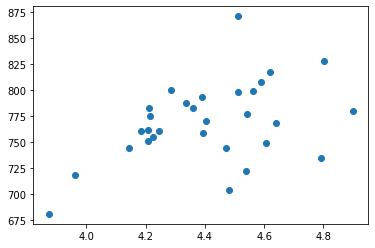

In [38]:
plt.scatter(x= wins_and_runs['R'], y = wins_and_runs['total_wins']);

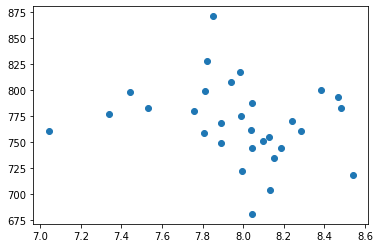

In [39]:
plt.scatter(x=wins_and_runs['SO'], y = wins_and_runs['total_wins']);

In [ ]:
# Runs per game important, Strikeouts not as important- Trend Doesn't stand out

# League Trends

In [44]:
total_wins.head() 

,abbr,home_wins,total_home_games,sum_y,total_away_games,away_wins,total_wins,total_games
0,ARI,363,770,427,768,341,704,1538
1,ATL,420,766,403,771,368,788,1537
2,BAL,425,775,423,768,345,770,1543
3,BOS,402,769,392,770,378,780,1539
4,CHC,435,777,415,763,348,783,1540


In [45]:
total_wins['away_win_pct'] = total_wins['away_wins']/total_wins['total_away_games']
total_wins['home_win_pct'] = (total_wins['home_wins']/total_wins['total_home_games'])

In [50]:
print(f"league wide home win %: {total_wins['home_wins'].sum()/total_wins['total_home_games'].sum()}")
print(f"league wide away win %: {total_wins['away_wins'].sum()/total_wins['total_away_games'].sum()}")

league wide home win %: 0.5381649627447582
league wide away win %: 0.4618350372552417


In [ ]:
# There is a significantly higher winning percentage on the road vs at home.